# Problem Set 2: Macroeconomics and Inequality in Uganda

In [1]:
# Initial settings

### NOTE !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# THESE ARE ALBERT ANSWERS. SOME OF THEM MIGHT BE MORE DETAIL SINCE I KNOW THE CONTEXT OF THE DATA AND A LITLE BIT OF THE COUNTRY.
# YOUR ANSWERS ESPECIALLY IN COMMENT RESULTS NEED NOT TO BE THAT DETAIL. MOSTLY IF YOU HAVE WRITTEN SOMETHING THAT IS REASONABLE
# YOU SHOULD TAKE FULL POINTS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
os.chdir('C:/Users/rodri/Dropbox/Programming for Economics/Problem Sets/data/')
from data_functions_albert import  gini

import warnings
warnings.filterwarnings('ignore')  #sns warning disactivated

#display options: To print entire tables
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199

# plots display default options
sns.set_palette("Set2")   # set of colors in seaborn
import matplotlib as mpl
fm = mpl.font_manager


import matplotlib as mpl             # default size and charactheristics of the plots
mpl.rcParams['figure.figsize'] = (7.6, 5.4)
mpl.rcParams['font.size'] = 14
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['figure.titlesize'] = 14
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False
colormap = plt.cm.Dark2.colors

percentiles = [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95]

# Import Data 
data = pd.read_excel("UNPS_1112_PS2.xls")


## Exercise 1

In [6]:
# a. Are there duplicate households in the data? i.e. repeated household id ('hhid')?. How many observations the data contains (i.e. non-nan obervations in household id variable?
data[data.duplicated(keep=False)]  
print('1a =======)')
print('There are no duplicate households')

# total number of observations
print('total number of obsertations is N=', sum(data['hhid'].notna()))


# b. Present some basic summary statistics for some main variables. Anything wrong or we should be careful? like missing a lot of observations?
print('         ')
print('1b =======)')
data[['head_gender','head_age','familysize','consumption','income','wealth']].describe()



1a =======)
There are no duplicate households
total number of obsertations is N= 2613
         
1b =======)


,head_gender,head_age,familysize,consumption,income,wealth
count,"2,597.00","2,597.00","2,597.00","2,613.00","2,613.00","2,613.00"
mean,1.31,46.07,7.48,"1,803.79","1,860.08","4,912.70"
std,0.46,15.07,3.71,"1,308.74","2,607.52","8,359.89"
min,1.00,14.00,1.00,250.31,27.49,0.00
25%,1.00,34.00,5.00,918.32,471.20,720.02
50%,1.00,44.00,7.00,"1,426.61","1,061.19","2,108.60"
75%,2.00,56.00,9.00,"2,296.86","2,234.80","5,221.94"
max,2.00,100.00,33.00,"8,369.90","52,137.74","76,396.34"


Since we are on the process of data cleaning, here outliers are understood as very strange and likely wrong values that we definitely dont want to have in our data---i.e. age=300.
Rules of thumb for outliers---extreme-values not necessary wrong---are useful when we want to study average effects---as running regressions. Since here we are interested in inequality, we dont want to drop extreme-observations unless we think they are wrong
We might think that family size has an outlier with a value of 33.
We observe missing values in head characteristics. fortunately, the number of missing values on these variables is small (16 nans). CIW are positive, but W contains 0s.


In [11]:

# c. Using the head_gender variable that takes 1 if household head is male and 2 if household head is female, create a dummy variable for household head being female (i.e. 1 if female, 0 male).
# Note that head_gender might contain missing values and we do not want to assign missing values to 0 (male) in our dummy variable.
data['head_gender'].describe()  # we are missing some observations
sum(data['head_gender'].isna()) #16 missing observations

# We need to be careful at creating the dummy to not assign missing values to male.
data['head_female'] = np.nan
data.loc[data['head_gender']==1,'head_female'] = 0
data.loc[data['head_gender']==2,'head_female'] = 1

#  What is the proportion of households that the head is female? 
data['head_female'].describe() #note that we correctly have the same number of observations as head_gender variable.
print('         ')
print('1c =======)')
print(round(100*np.mean(data['head_female']),2), '% of the households have a female head of the household')


# d. what is the the average consumption, average household size, and average household head age for household head male vs female? You do not need to write down these answers, just print out the table. 
sum_bygender = data[['consumption','familysize','head_age','head_female']].groupby(by=['head_female']).mean()
print('         ')
print('1d =======)')
sum_bygender



         
1c =======)
31.42 % of the households have a female head of the household
         
1d =======)


,consumption,familysize,head_age
head_female,,,
0.00,"1,898.30",7.72,44.39
1.00,"1,593.26",6.96,49.73


Do we observe any differences between households with a head male vs female?

Comment (extensive): households with female head have notably lower aggregate household consumption, a bit smaller household size, and the head is notably older. Most regions of Uganda follow patriarcal structures were the head of the household will typically be the husband. Given this, and the observed higher average age for female heads, we might interpret that part of the female head households will also be single-head households were the husband left or died. This could partially explain the lower consumption for female head household. An interesting exercise would be to check number of adults in female households, their marital status (like widowed), and then study whether this type of households tend to receive more food transfers than others. This would show us an informal insurance mechanism (or safety net) for widowed or single-mothers women.

# Exercise 2

2a =======
             consumption  familysize  head_age
head_female                                   
0.00            1,898.30        7.72     44.39
1.00            1,593.26        6.96     49.73


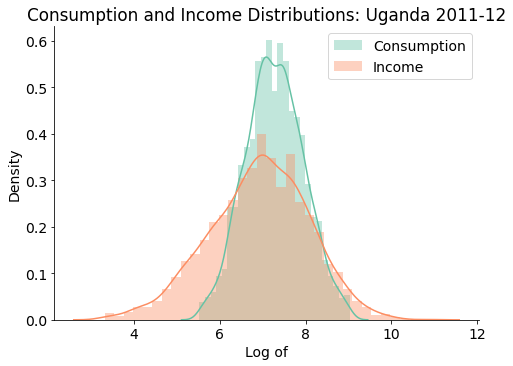

In [12]:

# a. Create the variables 'log_c' 'log_inc', 'log_w' that are the log of consumption, income, and wealth.
data[['consumption','income','wealth']].describe()  # 2613 observations. No observations below 0, but some equal to zero.

data[['wealth']] = data[['wealth']]

data[['log_c','log_inc','log_w']] = np.log(data[['consumption','income','wealth']])

data[['log_c','log_inc','log_w']] = data[['log_c','log_inc','log_w']].replace([-np.infty], np.nan)
### The log-variance measure of inequality is not the best when there might be a lot of zeros in the data.

print('2a =======')

# plot in the same graph the log_c and the log_inc. 
fig, ax = plt.subplots()
sns.distplot(data[['log_c']], label='Consumption')
sns.distplot(data[['log_inc']], label='Income')
plt.title('Consumption and Income Distributions: Uganda 2011-12')
plt.xlabel('Log of')
plt.ylabel('Density')
ax.legend()
plt.show()

The distributions roughly resemble to a normal distribution. The dispersion on the income distribution is larger. There is higher inequality in income than on consumption.

In [14]:
# b. Measuring inequality with the variance of the log: 
# Compute the variance of the log of consumption, income and wealth.
# How does these measures of inequality compare to the US? Is inequality large or smaller?

varlog = (data[['log_c','log_inc','log_w']].dropna()).var(axis=0)

### problem with the zeros. We won't be harsh at grading different values of varlog of wealth.


# to be able to print a nicer table let's make it a data frame
varlog = pd.DataFrame(varlog,columns=['Var-log'])
print('2b =======')
print('Inequality in Uganda: Variance of the log')
varlog

2b =======
Inequality in Uganda: Variance of the log


,Var-log
log_c,0.45
log_inc,1.34
log_w,2.68


Computing log of wealth was tricky and I gave some wrong solutions. Any value here is good.
We observe lower consumption inequality in Uganda than in the US. We observe larger inequality in terms of income and wealth.

In [15]:

# c. Measuring Between rural and urban inequality in Uganda: Compute the average C, I, W for rural and urban areas separately. 
data['reside'] = np.where(data['urban']==1, 'Urban', 'Rural')
avg_urb_rur = data[['consumption','income','wealth','reside']].groupby(by='reside').mean()


# Differences urban-rural large? A nice way to show the difference is by the ratio.
avg_urb_rur.loc['ratio'] = avg_urb_rur.loc['Rural'] / avg_urb_rur.loc['Urban']
print('2c =======')
print('Between Rural and Urban inequality in Uganda.')
avg_urb_rur

2c =======
Between Rural and Urban inequality in Uganda.


,consumption,income,wealth
reside,,,
Rural,"1,629.45","1,713.96","4,521.00"
Urban,"2,544.22","2,480.62","6,576.26"
ratio,0.64,0.69,0.69


In [17]:
# d. measuring within rural and urban inequality in Uganda: Compute variance of the log of C, I, W, for rural and urban areas separately.
varlog_urbrur = data[['log_c','log_inc','log_w','reside']].groupby(by='reside').var()
print('2d =======')
print('Within Rural and Urban inequality in Uganda.')
varlog_urbrur

2d =======
Within Rural and Urban inequality in Uganda.


,log_c,log_inc,log_w
reside,,,
Rural,0.41,1.34,2.39
Urban,0.44,1.11,3.92


In [18]:
# e. Inequality compute the Gini of Consumption, Income and Wealth.
gini_ciw = data[['consumption','income','wealth']].apply(gini)
gini_ciw = pd.DataFrame(gini_ciw,columns=['Gini'])

print('2e =======')
print('Inequality in Uganda: Gini coefficients')
gini_ciw



2e =======
Inequality in Uganda: Gini coefficients


,Gini
consumption,0.37
income,0.56
wealth,0.66


Uganda has lower inequality in consumption but higher in income with respect to the US.

In [20]:

# f.  Compute the share of wealth of the bottom 50%.  that the top 10, 5, 1% in wealth hold. 
def bottom_shares(variable, dataset, shares = [0.5]):
    bottom = [0]
    bottom.extend(shares)
    
    var_array = np.sort(np.array(dataset[variable].dropna()))
    var_total = sum(var_array)
    
    n= len(var_array)
    percentiles = n*np.array(bottom)
    percentiles = percentiles.tolist()
    percentiles = [int(x) for x in percentiles] 
    
    mg_bottom= []
    for i in range(1,len(percentiles)):
        print(i)
        a = sum(var_array[percentiles[0]:percentiles[i]])/var_total
        mg_bottom.append(a)
              
    return mg_bottom

w_bottom = bottom_shares('wealth',dataset=data,shares=[0.25])
print('2f =======')
print('The Bottom 50% hold only 8% of the total wealth in Uganda')


def top_shares(variable, dataset, shares =[ 0.90, 0.95, 0.99]):

    shares.append(1)
    var_array = np.sort(np.array(dataset[variable].dropna()))
    var_total = sum(var_array)
    n= len(var_array)
    percentiles = n*np.array(shares)
    percentiles = percentiles.tolist()
    percentiles = [int(x) for x in percentiles]
    
    mg_top = []
    for i in range(0,len(percentiles)-1):
        a = sum(var_array[percentiles[i]:percentiles[-1]])/var_total
        mg_top.append(a)               
    return  mg_top

w_top = top_shares('wealth',dataset=data,shares=[0.90, 0.95, 0.99])

print('the top 10%, 5% and 1% share 50%, 35%, and 11% of the wealth in the economy.')


1
2f =======
The Bottom 50% hold only 8% of the total wealth in Uganda
the top 10%, 5% and 1% share 50%, 35%, and 11% of the wealth in the economy.


### Question g.
We observe Uganda is a highly unequal country. The top 1% hold more wealth than half of the population. If for rich countries these high levels of inequality are a concern, then for poor countries they should also be a concern. Interestingly though, the transmission of income inequality to consumption inequality is much lower. In a country were there is almost no formal taxation, This provides evidence of large informal redistribution mechanisms, which partly might be motivated for insurance reasons.





### question h. 

'Measuring income inequality with consumption data will largely underpredict inequality. This is specially true for countries in SSA, where the transmission of income inequality into consumption inequality is low. 


# Exercise 3

3a =======


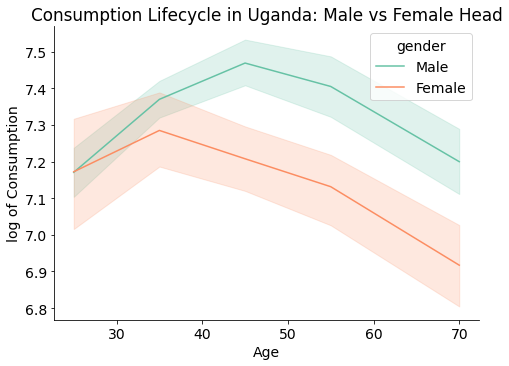

3b =======


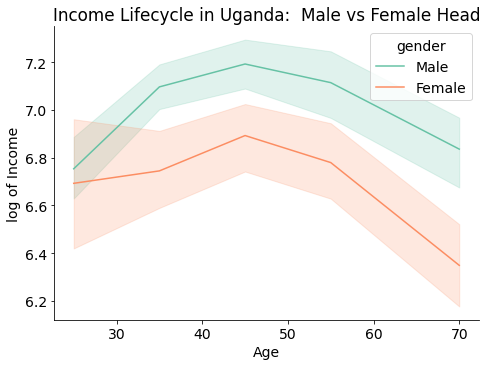

3c =======


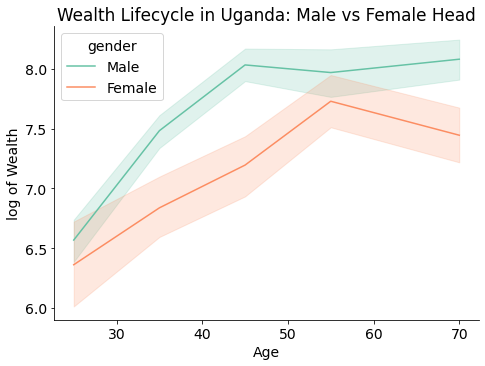

LIFE-CYCLE PLOTS IN PER CAPITA TERMS


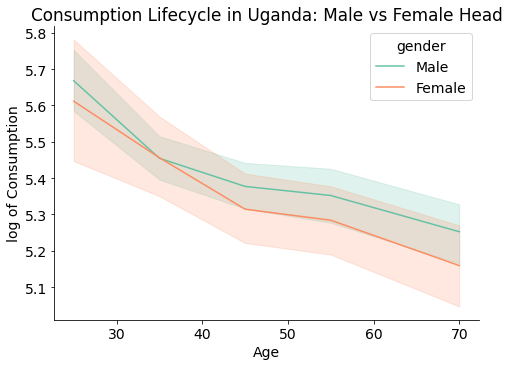

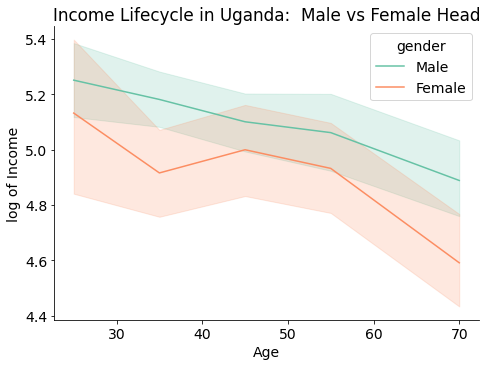

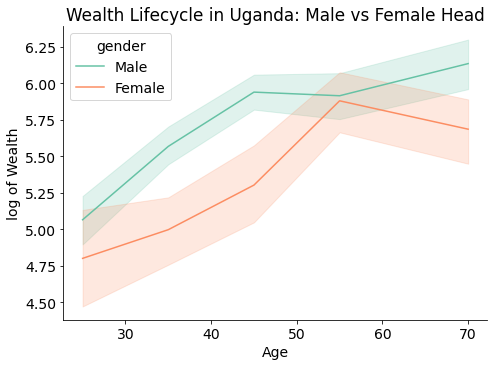

Controlling for household size almost eliminates the life-cycle differences that we observed before.
YET IT IS NOT THE SAME A HOUSEHOLD OF 5 ADULTS THAN A HOUSEHOLD WITH 2 ADULTS AND 3 KIDS. We would like to compute the per capita measures in adult equivalent terms.  


In [24]:
# Exercise 3: Plot the life-cycle of male vs female head households ===========

# Drop extreme values (too few observations to get means within age)
data = data[data['head_age'] < 80]
data = data[data['head_age'] >18]

# Lifecycle  Male vs Female heads ====================================
data["gender"] = np.where(data['head_female']==1, 'Female', 'Male')

# Group the ages in bins
bins = [18, 30, 40, 50, 60, 80]
labels = [25, 35, 45, 55, 70]
data['age_bins'] = pd.cut(data['head_age'],bins=bins, labels=labels)


# a. Consumption Lifecycle: male vs female household head 
print('3a =======')
fig, ax = plt.subplots()
fig1 = sns.lineplot('age_bins', 'log_c', hue='gender', data=data)
plt.title('Consumption Lifecycle in Uganda: Male vs Female Head')
plt.ylabel('log of Consumption')
plt.xlabel('Age')
plt.show()

# b. Income Lifecycle: male vs female household head
print('3b =======')
fig, ax = plt.subplots()
sns.lineplot('age_bins', 'log_inc', hue='gender', data=data)
plt.title('Income Lifecycle in Uganda:  Male vs Female Head')
plt.ylabel('log of Income')
plt.xlabel('Age')
plt.show()

# c. Wealth Lifecycle:  male vs female household head
print('3c =======')
fig, ax = plt.subplots()   
sns.lineplot('age_bins', 'log_w', hue='gender', data=data)
plt.title('Wealth Lifecycle in Uganda: Male vs Female Head')
plt.ylabel('log of Wealth')
plt.xlabel('Age')
plt.show()

# d. Comment the results.

# My comment is that the previous plots are at household level, yet household size might change a lot across the age of the head.
# To check on that I repeat the plots but in per capita terms.

for var in ['consumption','income','wealth']:
    data[var+'_cap'] = data[var]/data['familysize']

data[['log_c_cap','log_inc_cap','log_w_cap']] = np.log(data[['consumption_cap','income_cap','wealth_cap']]).replace([-np.infty], np.nan)

print('LIFE-CYCLE PLOTS IN PER CAPITA TERMS')

# a. Consumption Lifecycle: male vs female household head 
fig, ax = plt.subplots()
fig1 = sns.lineplot('age_bins', 'log_c_cap', hue='gender', data=data)
plt.title('Consumption Lifecycle in Uganda: Male vs Female Head')
plt.ylabel('log of Consumption')
plt.xlabel('Age')
plt.show()

# b. Income Lifecycle: male vs female household head
fig, ax = plt.subplots()
sns.lineplot('age_bins', 'log_inc_cap', hue='gender', data=data)
plt.title('Income Lifecycle in Uganda:  Male vs Female Head')
plt.ylabel('log of Income')
plt.xlabel('Age')
plt.show()

# c. Wealth Lifecycle:  male vs female household head
fig, ax = plt.subplots()   
sns.lineplot('age_bins', 'log_w_cap', hue='gender', data=data)
plt.title('Wealth Lifecycle in Uganda: Male vs Female Head')
plt.ylabel('log of Wealth')
plt.xlabel('Age')
plt.show()


print('Controlling for household size almost eliminates the life-cycle differences that we observed before.')

print('YET IT IS NOT THE SAME A HOUSEHOLD OF 5 ADULTS THAN A HOUSEHOLD WITH 2 ADULTS AND 3 KIDS. We would like to compute the per capita measures in adult equivalent terms.  ') 